In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [67]:
import random

# Organize and PreProcess Images

In [75]:
%cd
os.chdir('DS22/malaria-detection/cell_images')
if os.path.isdir('train/Uninfected') is False:
    os.makedirs('train/Uninfected')
    os.makedirs('train/Parasitized')
    os.makedirs('val/Uninfected')
    os.makedirs('val/Parasitized')
    for i in random.sample(glob.glob('Uninfected/*'), 9645):
        shutil.move(i, 'train/Uninfected')      
    for i in random.sample(glob.glob('Parasitized/*'), 9645):
        shutil.move(i, 'train/Parasitized')
    for i in random.sample(glob.glob('Uninfected/*'), 3984):
        shutil.move(i, 'val/Uninfected')        
    for i in random.sample(glob.glob('Parasitized/*'), 3984):
        shutil.move(i, 'val/Parasitized')

/Users/jenniferquigley


In [88]:
# Confirm correct sizes
print(len(os.listdir('train/Uninfected')))
print(len(os.listdir('train/Parasitized')))
print(len(os.listdir('val/Uninfected')))
print(len(os.listdir('val/Parasitized')))

9645
9645
3984
3984


In [89]:
pwd

'/Users/jenniferquigley/DS22/malaria-detection/cell_images'

In [90]:
train_path = 'train'
val_pth = 'val'

In [123]:
train_datagen = ImageDataGenerator(rescale=1/255, vertical_flip=True, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1/255, vertical_flip=True, horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(
        train_path,
        classes = ['Uninfected', 'Parasitized'],
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')


val_generator = validation_datagen.flow_from_directory(
        val_pth, 
        classes = ['Uninfected', 'Parasitized'],
        target_size=(224, 224),
        batch_size=5,
        class_mode='binary',
        shuffle=False)

Found 19290 images belonging to 2 classes.
Found 7968 images belonging to 2 classes.


In [124]:
imgs, labels = next(train_generator)

In [147]:
def showImages(images_arr):
    fig, axes = plt.subplots(4, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout(pad=0.4, )
    plt.show()

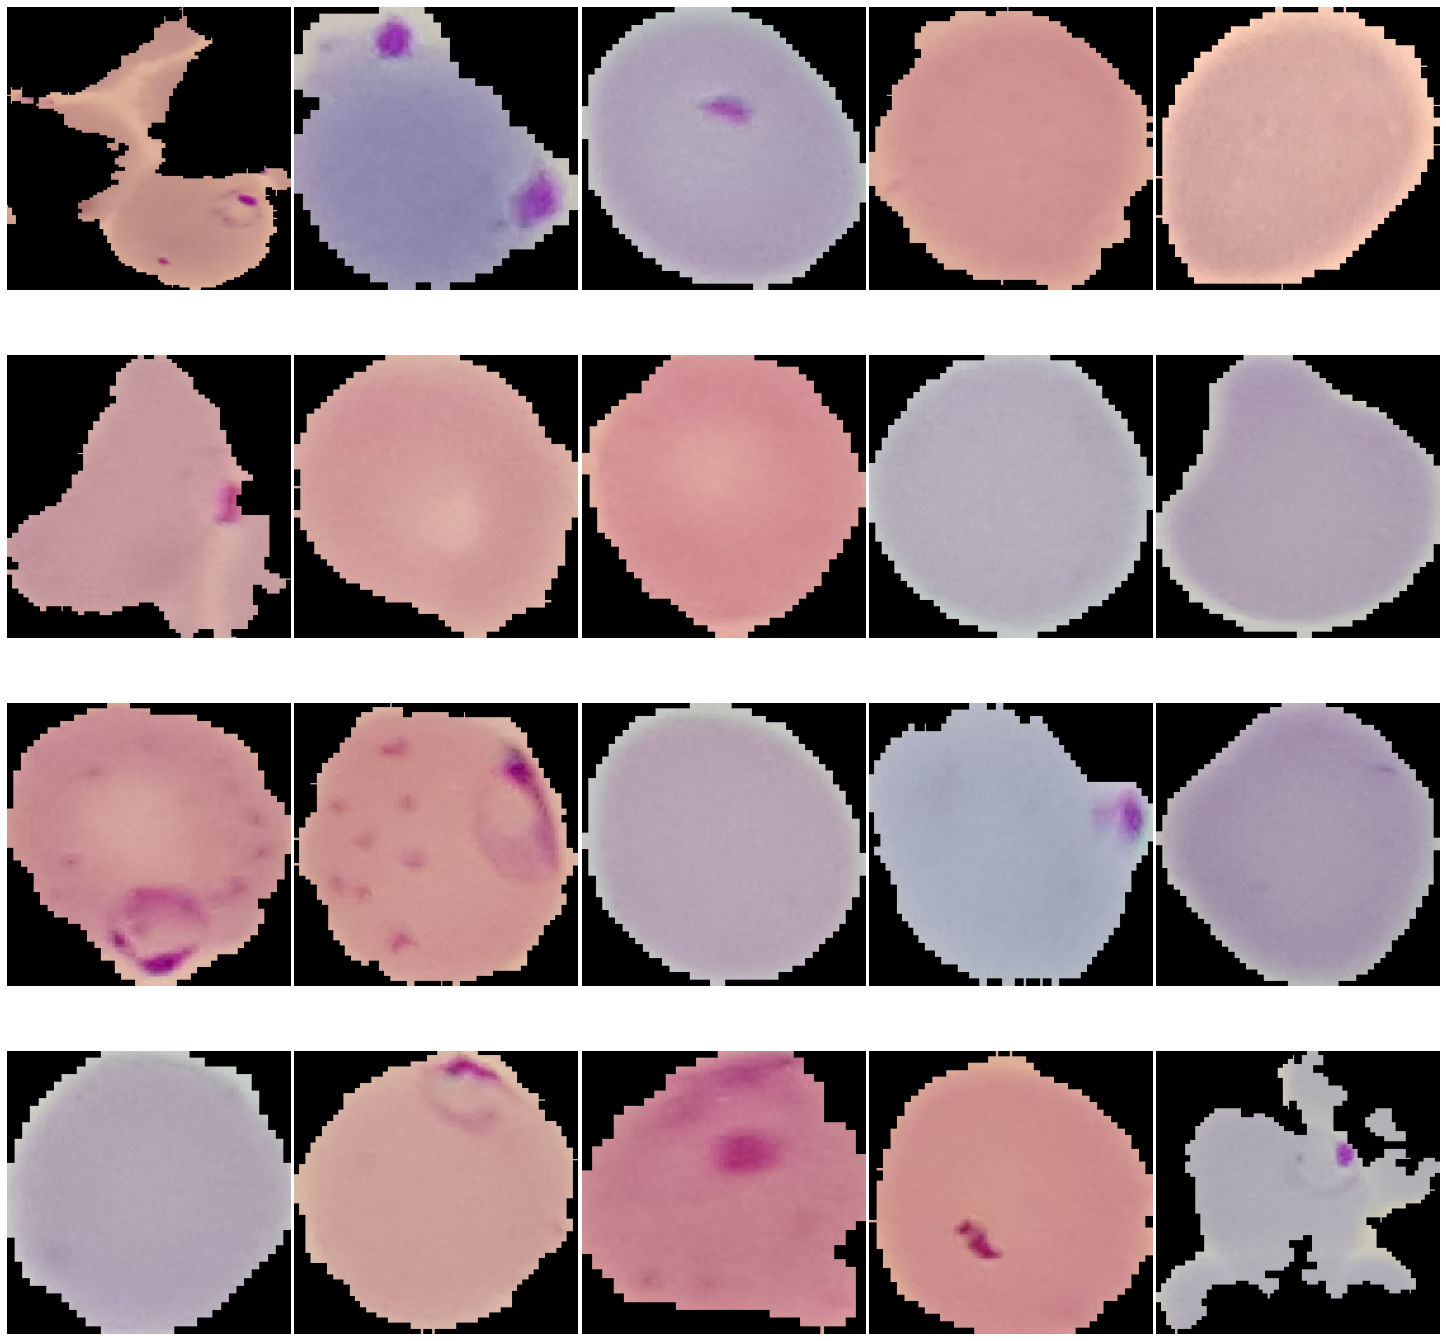

[1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.]


In [148]:
showImages(imgs)
print(labels)

# Building Model

In [109]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (224,224,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [110]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               19267712  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 19,267,841
Trainable params: 19,267,841
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               19267712  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 19,267,841
Trainable params: 19,267,841
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [112]:
model1 = model.fit(train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = val_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 1s 111ms/step - loss: 46.4885 - accuracy: 0.4594 - val_loss: 10.9369 - val_accuracy: 0.0000e+00
Epoch 2/15
8/8 [==============================] - 1s 96ms/step - loss: 4.6627 - accuracy: 0.5742 - val_loss: 1.0473 - val_accuracy: 0.5500
Epoch 3/15
8/8 [==============================] - 1s 96ms/step - loss: 2.0939 - accuracy: 0.4956 - val_loss: 0.9027 - val_accuracy: 0.4250
Epoch 4/15
8/8 [==============================] - 1s 97ms/step - loss: 1.1549 - accuracy: 0.4855 - val_loss: 2.1428 - val_accuracy: 0.1500
Epoch 5/15
8/8 [==============================] - 1s 99ms/step - loss: 1.1347 - accuracy: 0.4440 - val_loss: 1.8056 - val_accuracy: 0.1250
Epoch 6/15
8/8 [==============================] - 1s 118ms/step - loss: 1.0281 - accuracy: 0.5725 - val_loss: 2.6098 - val_accuracy: 0.0500
Epoch 7/15
8/8 [==============================] - 1s 101ms/step - loss: 1.0658 - accuracy: 0.6127 - val_loss: 0.2749 - val_accuracy: 0.9250
Epoch 8/15
8/8 [==

In [114]:
model.evaluate(val_generator)

1594/1594 [==============================] - 21s 13ms/step - loss: 1.2089 - accuracy: 0.5333


[1.2088587284088135, 0.5332580208778381]